# Use case

An Ecommerce company based in New York City that sells clothing online and also has in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website.

### Do the import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Get the Data

Use the Ecommerce Customers csv file from the company. 
It has Customer info, such as Email, Address, and their color Avatar. Then it also has numerical value columns:

Avg. Session Length: Average session of in-store style advice sessions.
Time on App: Average time spent on App in minutes
Time on Website: Average time spent on Website in minutes
Length of Membership: How many years the customer has been a member.

In [3]:
customers = pd.read_csv("Ecommerce Customers")

In [4]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [6]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


# Use a heatmap and co relation to see which variables are highly correlated

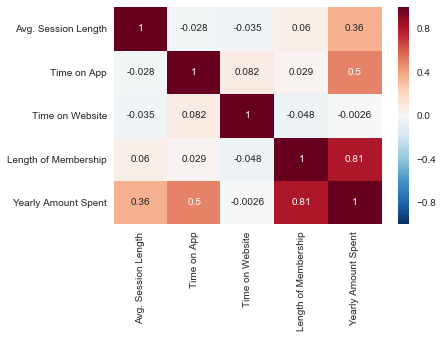

In [9]:
sns.heatmap(customers.corr(),annot=True)

### Thus yearly amount speant seems highly correlated with "Length of Membership" and somewhat correlated "Time on app"

## Do a lm plot between "Length of membership" and "Amount spent"

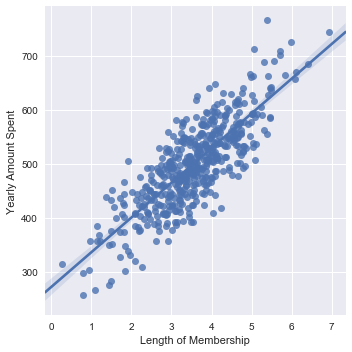

In [11]:
sns.lmplot(x="Length of Membership", y="Yearly Amount Spent",data=customers)

# Training and Testing the model

Set a variable X equal to the Features and
a variable Y equal to the "Yearly Amount spent"

In [12]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [33]:
X=customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y=customers['Yearly Amount Spent']

## Split the data into training and testing parts

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

## Train the model

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lm = LinearRegression()

In [38]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Print out the coeff of the model

In [43]:
pd.DataFrame(data=lm.coef_,index=X_train.columns,columns=['Coefficient'])

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


### Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.98 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.59 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.19 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.27 total dollars spent**.

## Predict the test data

In [44]:
prediction = lm.predict(X_test)

### Create a scattter plot of y_test v/s the predictions we came up with

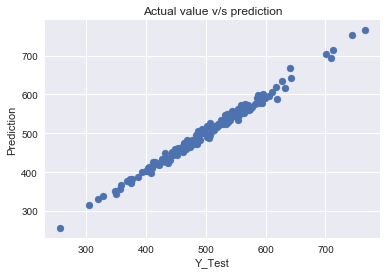

In [49]:
plt.scatter(y_test,prediction)
plt.xlabel("Y_Test")
plt.ylabel("Prediction")
plt.title("Actual value v/s prediction")

## Evaluate the model

We use :
   - Mean Absolute Error     "MAE"
   - Mean Squared Error      "MSE"
   - Root Mean Squared Error "RMSE"

In [54]:
from sklearn import metrics

MAE = metrics.mean_absolute_error(y_test,prediction)
MSE = metrics.mean_squared_error(y_test,prediction)
RMSE = np.sqrt(MSE)

print('MAE  :', MAE)
print('MSE  :' , MSE)
print('RMSE :',RMSE)

MAE  : 7.22814865343
MSE  : 79.813051651
RMSE : 8.93381506698


## Residuals

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


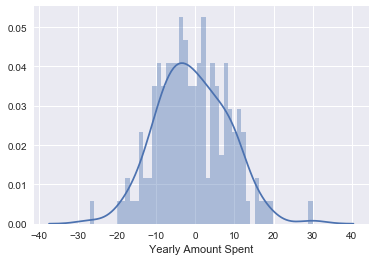

In [58]:
sns.distplot((y_test-prediction),bins=50)

## Conclusion

so does the company need to develop the app or the website or does it even matter since clearly "Length of membership" seems to be the major deciding factor

Clearly the app seems to generate more revenue so maybe that is where the future of the business is, however there probably requires a further investigation into the relationship between the length of membership and the app or website before coming to a strong conclusion